#  <span style="color:BLUE">IMPORTACIÓN DE LIBRERIAS</span>

In [1]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from time import time

#  <span style="color:BLUE">CARGA DEL DATASET (3000K DE IMÁGENES)</span>



In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 16s 0us/step


#  <span style="color:BLUE">NORMALIZACIÓN DEL DATASET (MEAS Y STD)</span>

In [3]:
mean=np.mean(x_train, axis=(0,1,2,3))
std=np.std(x_train, axis=(0,1,2,3))
x_train =(x_train)/(std+1e-7)
x_test =(x_test)/(std+1e-7)


#  <span style="color:BLUE">CREACIÓN DEL MODELO</span>

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#  <span style="color:BLUE">ENTRENAMIENTO DEL MODELO</span>

In [5]:
start_time = time()
history = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Epoch 1/10
391/391 [==============================] - 5s 13ms/step - loss: 1.7310 - accuracy: 0.3500 - val_loss: 1.3882 - val_accuracy: 0.4906
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.2963 - accuracy: 0.5275 - val_loss: 1.1332 - val_accuracy: 0.5945
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.1111 - accuracy: 0.6029 - val_loss: 0.9572 - val_accuracy: 0.6616
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0066 - accuracy: 0.6430 - val_loss: 0.8747 - val_accuracy: 0.6913
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 0.9150 - accuracy: 0.6763 - val_loss: 0.8293 - val_accuracy: 0.7069
Epoch 6/10
391/391 [==============================] - 5s 12ms/step - loss: 0.8590 - accuracy: 0.6976 - val_loss: 0.8294 - val_accuracy: 0.7084
Epoch 7/10
391/391 [==============================] - 5s 12ms/step - loss: 0.8115 - accuracy: 0.7147 - val_loss: 0.7407 - val_accuracy: 0.7386

#  <span style="color:BLUE">RESULTADOS DE LA EVALUACIÓN</span>

In [6]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.7586
Test loss 0.6855, accuracy 75.86%


#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO ACC</span>

Text(0, 0.5, 'acc')

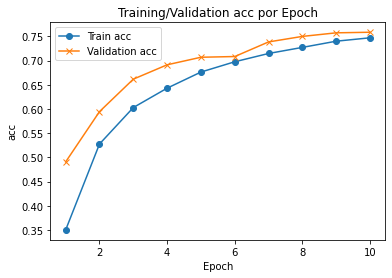

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO LOSS</span>

Text(0, 0.5, 'Loss')

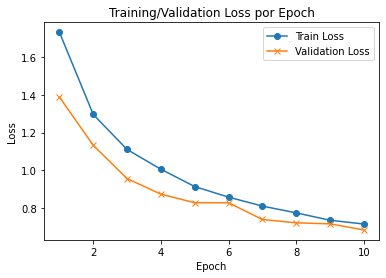

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')